# TEORÍA DE PORTAFOLIOS

In [ ]:
#Instalamos las librerías necesarias

!pip install yahoo_fin
!pip install yahoo_fin --upgrade
!pip install pandas_datareader

import yahoo_fin as yfin
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
from datetime import datetime
import statistics
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas_datareader import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=7c8392353a272b9f2325b2660799569da2f6e9639ba3c7c8a5114fb040109aa3
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
# EXTRAEMOS DE YAHOO FINANCE LOS DATOS HISTORICOS DE LAS ACCIONES QUE VAN A CONFORMAR EL PORTAFOLIO
IBM_s_t = si.get_data("IBM", start_date = "11/28/2018", end_date = "11/28/2023")
AMZN_s_t = si.get_data("AMZN", start_date = "11/28/2018", end_date = "11/28/2023")
AAPL_s_t = si.get_data("AAPL", start_date = "11/28/2018", end_date = "11/28/2023")
MSFT_s_t = si.get_data("MSFT", start_date = "11/28/2018", end_date = "11/28/2023")
TSLA_s_t = si.get_data("TSLA", start_date = "11/28/2018", end_date = "11/28/2023")
ORCL_s_t = si.get_data("ORCL", start_date = "11/28/2018", end_date = "11/28/2023")
JNJ_s_t = si.get_data("JNJ", start_date = "11/28/2018", end_date = "11/28/2023")
GM_s_t = si.get_data("GM", start_date = "11/28/2018", end_date = "11/28/2023")
BABA_s_t = si.get_data("BABA", start_date = "11/28/2018", end_date = "11/28/2023")

In [ ]:
# Tabla con AdjClose
portafolio = pd.concat([IBM_s_t["adjclose"],AMZN_s_t["adjclose"],AAPL_s_t["adjclose"],MSFT_s_t["adjclose"],TSLA_s_t["adjclose"],ORCL_s_t["adjclose"],JNJ_s_t["adjclose"],GM_s_t["adjclose"],BABA_s_t["adjclose"]], axis=1)
portafolio.columns = ["IBM","AMZN","AAPL","MSFT","TSLA","ORCL","JNJ","GM","BABA"]
portafolio.head()

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
2018-11-28,90.407829,83.887497,43.302979,105.134850,23.191334,44.085957,125.921783,34.044521,157.226456
2018-11-29,89.290581,83.678497,42.970322,104.254936,22.744667,43.820660,125.414459,33.869453,154.207047
2018-11-30,91.341293,84.508499,42.738186,104.917221,23.365334,44.607418,126.317345,34.965881,158.726303
2018-12-03,92.105698,88.617996,44.231560,106.052582,23.899332,45.586292,125.724037,35.426579,161.568100
2018-12-04,89.378769,83.419998,42.285862,102.674881,23.980000,44.598263,125.569244,33.648323,156.239716


<Axes: >

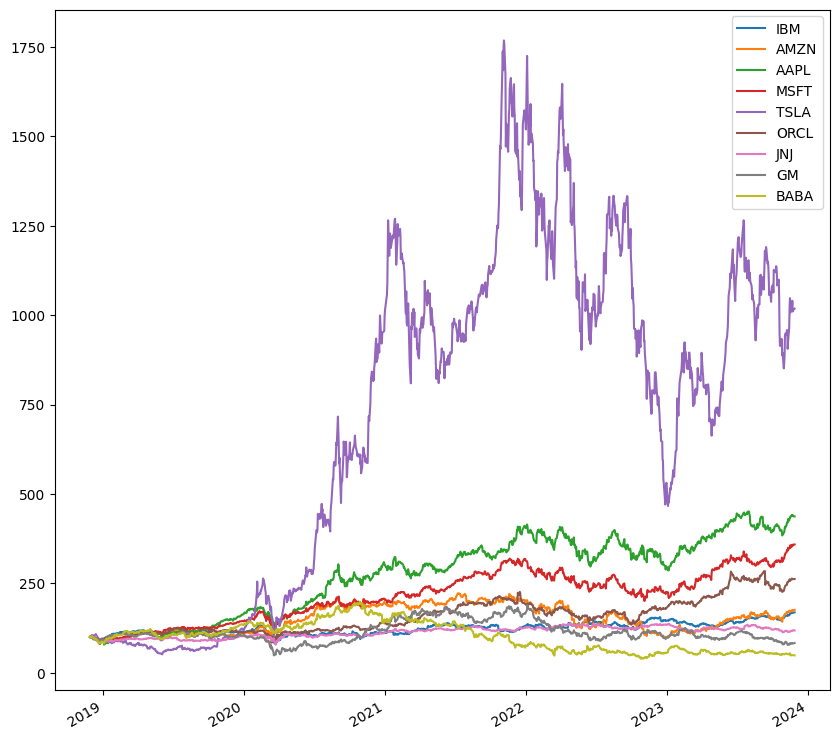

In [ ]:
(portafolio/portafolio.iloc[0]*100).plot(figsize=(10,10))

In [ ]:
list_portafolio = ["IBM","AMZN","AAPL","MSFT","TSLA","ORCL","JNJ","GM","BABA"]

In [ ]:
# Método para calcular los rendimeintos
def calcular_retornos(portafolio):
    return portafolio.pct_change()
# Calcular los rendimientos
retornos = calcular_retornos(portafolio)
retornos.dropna()
retornos.sum()

IBM     0.700021
AMZN    0.887528
AAPL    1.741913
MSFT    1.516144
TSLA    3.378591
ORCL    1.193575
JNJ     0.272882
GM      0.258661
BABA   -0.144784
dtype: float64

In [ ]:
retornos

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
2018-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-29,-0.012358,-0.002491,-0.007682,-0.008369,-0.019260,-0.006018,-0.004029,-0.005142,-0.019204
2018-11-30,0.022967,0.009919,-0.005402,0.006353,0.027288,0.017954,0.007199,0.032372,0.029306
2018-12-03,0.008369,0.048628,0.034942,0.010821,0.022854,0.021944,-0.004697,0.013176,0.017904
2018-12-04,-0.029607,-0.058656,-0.043989,-0.031849,0.003375,-0.021674,-0.001231,-0.050196,-0.032979
...,...,...,...,...,...,...,...,...,...
2023-11-20,0.009549,0.006544,0.009278,0.020522,0.005548,0.013523,0.008816,0.017481,0.011083
2023-11-21,-0.002851,-0.015260,-0.004231,-0.011578,0.023769,-0.007184,0.008071,-0.021739,0.006118
2023-11-22,0.007927,0.019528,0.003515,0.012813,-0.028980,0.001378,-0.001985,0.007169,0.000253
2023-11-24,0.000322,0.000204,-0.007004,-0.001112,0.005294,0.000086,0.011139,0.002847,-0.005952


In [ ]:
# Método para el rendimeinto logarítmico
def retornos_log(portafolio):
  return np.log(portafolio) - np.log(portafolio.shift(1))
log_retornos = retornos_log(portafolio)
log_retornos = log_retornos.dropna()
log_retornos.sum()

IBM     0.523812
AMZN    0.565910
AAPL    1.475066
MSFT    1.277613
TSLA    2.320392
ORCL    0.964403
JNJ     0.167856
GM     -0.183575
BABA   -0.720375
dtype: float64

In [ ]:
# Tabla de promedio de retornos
log_retornos

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
2018-11-29,-0.012435,-0.002495,-0.007712,-0.008405,-0.019448,-0.006036,-0.004037,-0.005156,-0.019391
2018-11-30,0.022707,0.009870,-0.005417,0.006332,0.026923,0.017795,0.007173,0.031859,0.028885
2018-12-03,0.008334,0.047483,0.034346,0.010763,0.022597,0.021707,-0.004708,0.013090,0.017745
2018-12-04,-0.030054,-0.060447,-0.044986,-0.032368,0.003370,-0.021912,-0.001232,-0.051499,-0.033535
2018-12-06,0.018819,0.018287,-0.011212,0.006155,0.009298,-0.043389,-0.000822,-0.012249,-0.015979
...,...,...,...,...,...,...,...,...,...
2023-11-20,0.009504,0.006522,0.009235,0.020314,0.005533,0.013432,0.008777,0.017330,0.011022
2023-11-21,-0.002855,-0.015378,-0.004240,-0.011646,0.023491,-0.007210,0.008039,-0.021979,0.006099
2023-11-22,0.007895,0.019339,0.003508,0.012731,-0.029408,0.001377,-0.001987,0.007143,0.000253
2023-11-24,0.000322,0.000204,-0.007029,-0.001112,0.005280,0.000086,0.011078,0.002843,-0.005970


<Axes: >

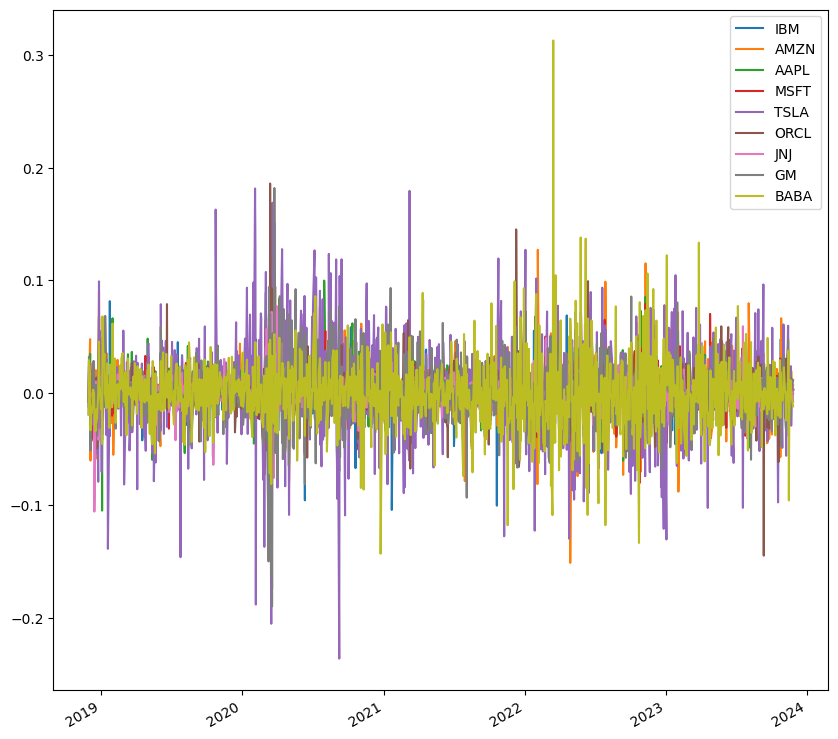

In [ ]:
log_retornos.plot(figsize=(10,10))

In [ ]:
# Asignamos "pesos" de manera aleatoria
num_stocks = len(list_portafolio)
random_array = np.random.random(num_stocks)
# La suma de los pesos = 1
pesos = np.random.random(num_stocks)
pesos /= np.sum(pesos)
pesos

array([0.18214758, 0.11095661, 0.02445909, 0.10110621, 0.0544578 ,
       0.13239164, 0.17316914, 0.12547022, 0.09584171])

In [ ]:
# Calculamos el retorno
np.sum(pesos*log_retornos.mean())*250 #250 sesiones en un año

0.095744998362243

In [ ]:
# Calculamos la volatilidad
varianza = np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos)) #haciendo uso del producto punto
volatilidad = np.sqrt(varianza)
volatilidad

0.22420942053637563

In [ ]:
# Se realizan las simulaciones con el portafolio y los pesos aleatorios
retornos_portafolio = []
volatilidades_portafolio = []
for x in range (1000):
  pesos = np.random.random(num_stocks)
  pesos /= np.sum(pesos)
  retornos_portafolio.append(np.sum(pesos*log_retornos.mean())*250)
  volatilidades_portafolio.append(np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos))))

In [ ]:
# Imprimimos los retornos y comparamos con la volatilidad
retornos_portafolio = np.array(retornos_portafolio)
volatilidades_portafolio = np.array(volatilidades_portafolio)
portafolios2 = pd.DataFrame({"Retorno":retornos_portafolio,"Volatilidad":volatilidades_portafolio})
portafolios2.tail()

,Retorno,Volatilidad
995,0.191856,0.300463
996,0.212084,0.293693
997,0.134499,0.242935
998,0.086694,0.226217
999,0.122744,0.234872


Text(0, 0.5, 'Retorno')

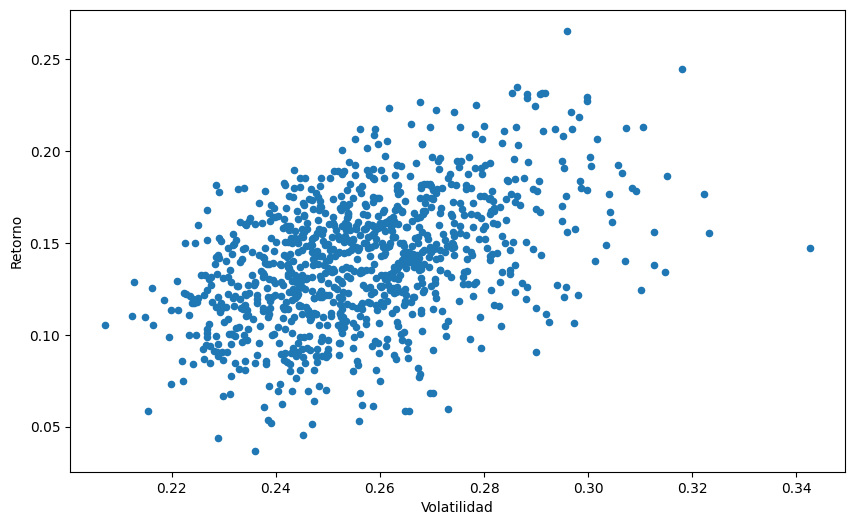

In [ ]:
# Graficamos la frontera eficiente (dispersión de volatilidad y retornos)
portafolios2.plot(x="Volatilidad",y="Retorno",kind="scatter",figsize=(10,6))
plt.xlabel("Volatilidad")
plt.ylabel("Retorno")

In [ ]:
# Calculamos los retornos esperados
RetornosE = pd.DataFrame(log_retornos.mean()) #obtenemos el promedio de cada acción
RetornosE

,0
IBM,0.000417
AMZN,0.000451
AAPL,0.001174
MSFT,0.001017
TSLA,0.001847
ORCL,0.000768
JNJ,0.000134
GM,-0.000146
BABA,-0.000574


In [ ]:
# Calculamos el riesgo individual por acción
RiesgoI = pd.DataFrame(log_retornos.std()) #obtenemos la desviación estandar de cada acción
RiesgoI

,0
IBM,0.016781
AMZN,0.022634
AAPL,0.020590
MSFT,0.019473
TSLA,0.041037
ORCL,0.019053
JNJ,0.012946
GM,0.026573
BABA,0.030126


In [ ]:
# Realizamos la matriz de varianza y covarianza
datacov = log_retornos.select_dtypes(include=["float64","int"])
corr_matrix = datacov.corr(method="pearson")
corr_matrix

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
IBM,1.000000,0.299769,0.449281,0.455850,0.206164,0.497549,0.485668,0.473621,0.204650
AMZN,0.299769,1.000000,0.631653,0.691038,0.442187,0.413915,0.245077,0.322928,0.361822
AAPL,0.449281,0.631653,1.000000,0.765467,0.497747,0.526108,0.409782,0.429307,0.379628
MSFT,0.455850,0.691038,0.765467,1.000000,0.466137,0.587777,0.425740,0.422988,0.352723
TSLA,0.206164,0.442187,0.497747,0.466137,1.000000,0.244355,0.122685,0.377731,0.325805
ORCL,0.497549,0.413915,0.526108,0.587777,0.244355,1.000000,0.409268,0.404701,0.260783
JNJ,0.485668,0.245077,0.409782,0.425740,0.122685,0.409268,1.000000,0.258216,0.139443
GM,0.473621,0.322928,0.429307,0.422988,0.377731,0.404701,0.258216,1.000000,0.316858
BABA,0.204650,0.361822,0.379628,0.352723,0.325805,0.260783,0.139443,0.316858,1.000000


In [ ]:
# Rendimiento esperado del portafolio
# Asignamos pesos aleatorios a cada acción
pesos = np.random.random(9)
pesos /= np.sum(pesos)
pesos

array([0.17007602, 0.07677895, 0.15362527, 0.15398303, 0.00440882,
       0.06474115, 0.11748228, 0.08435165, 0.17455282])

In [ ]:
# Calculamos el rendimiento esperado
RetE = RetornosE.iloc[:, 0].values
print(RetE)

[ 0.00041705  0.00045057  0.00117442  0.00101721  0.00184745  0.00076784
  0.00013364 -0.00014616 -0.00057355]


In [ ]:
np.matmul(pesos,RetE) # Rendimiento esperado del portafolio con los pesos

0.0004036898156720875

In [ ]:
# Volatilidad

transpesos = pesos.transpose()
SxW = np.dot(corr_matrix, transpesos)
VARP = np.matmul(pesos,SxW)
VARP

0.4923783009004101

In [ ]:
# Riesgo inv del portafolio
RIP = np.sqrt(VARP)
RIP

0.7016967300054989

**Da una breve descripción del uso de la librería**

`PyPortfolioOpt`

**y sus principales atributos**

In [ ]:
# INSTALAMOS LA PAQUETERÍA PyPortfolioOpt y las funciones para resolver problemas de frontera eficiente
!pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
# Usamos la función EfficientFrontier para calcular los portafolios óptimos, con la condición de que los pesos deben ser positivos
ef = EfficientFrontier(RetE,corr_matrix,weight_bounds=(0,1))
# Obtenemos los pesos que nos generen la mínima volatilidad
w = ef.min_volatility()
c_w = ef.clean_weights()
c_w

OrderedDict([('IBM', 0.09856),
             ('AMZN', 0.09636),
             ('AAPL', 0.0),
             ('MSFT', 0.0),
             ('TSLA', 0.19151),
             ('ORCL', 0.08677),
             ('JNJ', 0.22249),
             ('GM', 0.09974),
             ('BABA', 0.20457)])

## Algoritmos genéticos.

**Escribe, detalladamente, en qué consisten los algoritmos genéticos**

Puedes usar las siguientes referencias:

- https://www.javatpoint.com/genetic-algorithm-in-machine-learning

- https://www.mathworks.com/help/gads/how-the-genetic-algorithm-works.html

- https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/

**Usando los mismos tickers de arriba, construye un algoritmo genético que optimice los pesos**


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'JNJ', 'JPM', 'BAC', 'GS', 'MS']
start_date = '2010-01-01'
data = yf.download(stocks, start=start_date)['Adj Close']
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


**Función fitness**

In [ ]:
def fitness_function(weights, data):
    data_returns = np.log(data) - np.log(data.shift(1))
    data_returns = data_returns.dropna()

    portfolio_returns = np.dot(data_returns, weights)
    portfolio_mean = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    sharpe_ratio = (portfolio_mean / portfolio_std) * np.sqrt(252)
    return sharpe_ratio

**Algoritmo genético**

In [ ]:
def genetic_algorithm(data, population_size=200, num_generations=50, mutation_rate=0.05, elitism=0.1):
    population = np.random.rand(population_size, len(data.columns))
    population = population / np.sum(population, axis=1)[:, np.newaxis]


    fitness = np.array([fitness_function(individual, data) for individual in population])

    for generation in range(num_generations):
        sorted_idx = np.argsort(fitness)[::-1]
        population = population[sorted_idx]
        fitness = fitness[sorted_idx]


        num_elites = int(elitism * population_size)

        offspring = population[:num_elites]

        parent1_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent2_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent1 = population[parent1_idx]
        parent2 = population[parent2_idx]

        crossover_prob = np.random.rand(population_size-num_elites, len(data.columns))
        crossover_mask = crossover_prob <= 0.5
        offspring_crossover = np.where(crossover_mask, parent1, parent2)

        mutation_prob = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_mask = mutation_prob <= mutation_rate
        mutation_values = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_direction = np.random.choice([-1, 1], size=(population_size-num_elites, len(data.columns)))
        offspring_mutation = np.where(mutation_mask, offspring_crossover + mutation_direction * mutation_values, offspring_crossover)


        offspring_mutation = offspring_mutation / np.sum(offspring_mutation, axis=1)[:, np.newaxis]


        population = np.vstack((population[:num_elites], offspring_mutation))


        fitness = np.array([fitness_function(individual, data) for individual in population])


    best_idx = np.argmax(fitness)
    best_individual = population[best_idx]
    print('Best Sharpe Ratio: ', np.max(fitness))

    return best_individual

**Algoritmo**

Best Sharpe Ratio:  0.9658823841346069


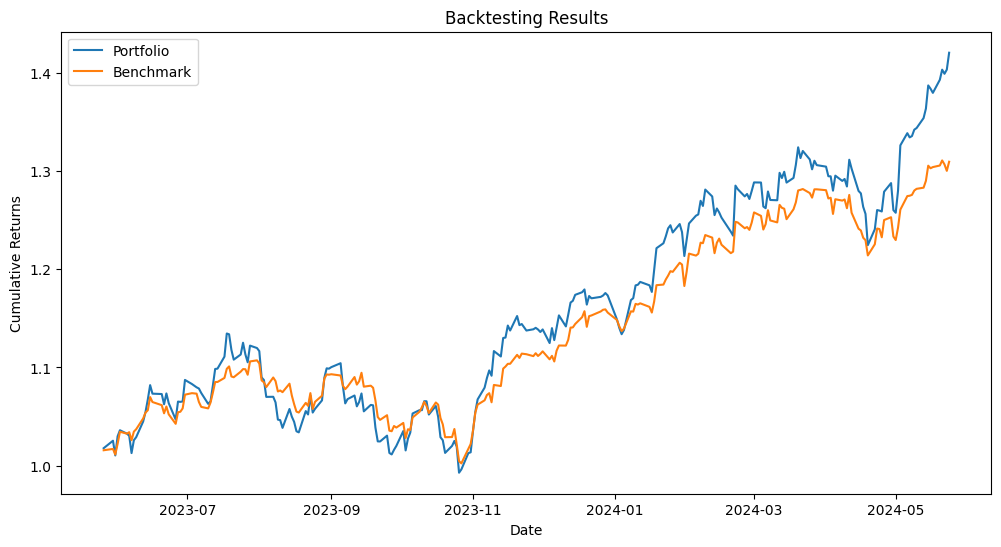

Estadísticas del portafolio:
---------------------
Rendimiento medio diario: 0.0015
Desviación estándar: 0.0111
Índice de Sharpe: 2.0952
Valor final: 1420.27

Estadísticas del benchmark:
---------------------
Rendimiento medio diario: 0.0011
Desviación estándar: 0.0077
Índice de Sharpe: 2.2710
Valor final: 1309.31


In [ ]:
from datetime import datetime, timedelta
import numpy as np

np.random.seed(42)

def backtest(genetic_algorithm, data, benchmark, initial_capital):

    train_data = data.iloc[:-252]
    test_data = data.iloc[-252:]

    weights = genetic_algorithm(data=train_data, population_size=100, num_generations=50, mutation_rate=0.01, elitism=0.01)

    weights[weights < 0] = 0

    weights /= weights.sum()

    portfolio_returns = np.dot(test_data.pct_change().dropna(), weights)
    portfolio_cum_returns = np.cumprod(1 + portfolio_returns)
    portfolio_value = initial_capital * portfolio_cum_returns[-1]
    benchmark_returns = benchmark.iloc[-252:].pct_change().dropna()
    benchmark_cum_returns = np.cumprod(1 + benchmark_returns)
    benchmark_value = initial_capital * benchmark_cum_returns[-1]


    portfolio_mean_return = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    portfolio_sharpe_ratio = (portfolio_mean_return / portfolio_std) * np.sqrt(252)
    benchmark_mean_return = np.mean(benchmark_returns)
    benchmark_std = np.std(benchmark_returns)
    benchmark_sharpe_ratio = (benchmark_mean_return / benchmark_std) * np.sqrt(252)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(benchmark_cum_returns.index, portfolio_cum_returns, label='Portfolio')
    ax.plot(benchmark_cum_returns, label='Benchmark')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.set_title('Backtesting Results')
    ax.legend()
    plt.show()


    print('Estadísticas del portafolio:')
    print('---------------------')
    print('Rendimiento medio diario: {:.4f}'.format(portfolio_mean_return))
    print('Desviación estándar: {:.4f}'.format(portfolio_std))
    print('Índice de Sharpe: {:.4f}'.format(portfolio_sharpe_ratio))
    print('Valor final: {:.2f}'.format(portfolio_value))
    print('')
    print('Estadísticas del benchmark:')
    print('---------------------')
    print('Rendimiento medio diario: {:.4f}'.format(benchmark_mean_return))
    print('Desviación estándar: {:.4f}'.format(benchmark_std))
    print('Índice de Sharpe: {:.4f}'.format(benchmark_sharpe_ratio))
    print('Valor final: {:.2f}'.format(benchmark_value))

    return portfolio_returns, benchmark_returns, portfolio_cum_returns, benchmark_cum_returns

portfolio_returns, benchmark_returns, portfolio_cum_returns, benchmark_cum_returns = backtest(genetic_algorithm, data, benchmark, initial_capital=1000)